# GDP Growth Analysis (2020–2025)

This notebook explores global GDP data between 2020 and 2025.  
The purpose of the project is to practice **data cleaning, exploratory data analysis (EDA), visualization, and simple feature engineering**.

## Objectives
- Examine the distribution of GDP across countries and years.
- Calculate growth and growth rates (2020 → 2025).
- Classify countries by growth category (*Shrinking*, *Moderate*, *High Growth*).
- Compare GDP statistics across regions and visualize trends.
- Investigate the relationship between initial GDP and growth rates.
- Apply basic transformations (scaling, ranking) for deeper insights.

## Dataset
- **Source**: `gdp_set.csv` (structured dataset of GDP values by country, 2020–2025).
- **Columns**:
  - `Country` — country name
  - `2020` … `2025` — GDP values per year
- Additional features will be derived during the analysis (e.g., growth, region, ranks).

---

# Imports and settings:

In [3]:
%pip install --upgrade pip
%pip install matplotlib pycountry-convert scikit-learn pycountry


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.10.6-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached pycountry_convert-0.7.2-py3-none-any.whl.metadata (7.2 kB)
  Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached pycountry-24.6.1-py3-none-any.whl.metadata (12 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp313-cp313-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
  Using cached pprintpp-0.4.0-py2.py3-none-any.whl.metadata (7.9 kB)
  Using cached pytest-8.4.2-py3-none-any.whl.metadata (7.7 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import pycountry_convert as pc
from sklearn.preprocessing import MinMaxScaler, StandardScaler

pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 50)
plt.rcParams["figure.figsize"] = (9, 5)

# Load Data

In [5]:
PATH = "data/gdp_set.csv"
df = pd.read_csv(PATH)
df.head()

,Country,2020,2021,2022,2023,2024,2025
0,Afghanistan,20136,14278.0,14501.0,17248.0,NaN,NaN
1,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0
2,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0
3,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0
4,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0


# Helpers

In [6]:
def classify_growth(x):
    if pd.isna(x):
        return None
    if x < 0:
        return "Shrinking"
    elif x < 50:
        return "Moderate"
    else:
        return "High Growth"

def country_to_continent(country_name):
    try:
        code = pc.country_name_to_country_alpha2(country_name)
        cont = pc.country_alpha2_to_continent_code(code)
        return pc.convert_continent_code_to_continent_name(cont)
    except Exception:
        return None


# Basic EDA

In [11]:
print("Shape:", df.shape)
print(df.info())
display(df.isna().sum())
display(df.describe(include='number').round(2))
print("Unique countries:", df["Country"].nunique())
display(df["Country"].value_counts().head())

Shape: (196, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  196 non-null    object 
 1   2020     196 non-null    int64  
 2   2021     194 non-null    float64
 3   2022     194 non-null    float64
 4   2023     194 non-null    float64
 5   2024     192 non-null    float64
 6   2025     189 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 10.8+ KB
None


Country    0
2020       0
2021       2
2022       2
2023       2
2024       4
2025       7
dtype: int64

,2020,2021,2022,2023,2024,2025
count,196.00,194.00,194.00,194.00,192.00,189.00
mean,437888.64,504350.44,525506.38,548617.28,575687.07,599141.45
std,1942936.36,2220863.84,2347885.59,2453040.20,2573188.70,2693421.22
min,52.00,62.00,61.00,63.00,65.00,65.00
25%,9588.00,11141.75,12650.00,13604.50,13500.50,14214.00
50%,35334.50,37719.00,41568.00,43631.00,47135.50,47829.00
75%,207481.00,254613.25,274630.75,285035.50,291510.75,303293.00
max,21354125.00,23681175.00,26006900.00,27720725.00,29184900.00,30507217.00


Unique countries: 196


Country
Afghanistan    1
Albania        1
Algeria        1
Andorra        1
Angola         1
Name: count, dtype: int64

# Growth metrics

In [12]:
df["Growth"] = df["2025"] - df["2020"]
df["GrowthRate"] = (df["2025"] - df["2020"]) / df["2020"] * 100
df["Country"] = df["Country"].str.strip()
print("Duplicates in Country:", df["Country"].duplicated().sum())
df.head()

Duplicates in Country: 0


,Country,2020,2021,2022,2023,2024,2025,Growth,GrowthRate
0,Afghanistan,20136,14278.0,14501.0,17248.0,NaN,NaN,NaN,NaN
1,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0,13101.0,85.790060
2,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0,104111.0,63.184119
3,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0,1150.0,39.861352
4,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0,46822.0,70.386795


# Quick Answers

In [13]:
print("Top by 2020:\n", df.sort_values(by="2020", ascending=False).head(1)[["Country","2020"]])
print("Top by 2025:\n", df.sort_values(by="2025", ascending=False).head(1)[["Country","2025"]])
print("Max growth (abs):\n", df.sort_values(by="Growth", ascending=False).head(1)[["Country","Growth"]])
print("Max growth rate:\n", df.sort_values(by="GrowthRate", ascending=False).head(1)[["Country","GrowthRate"]])
print("Min growth rate:\n", df.sort_values(by="GrowthRate", ascending=True).head(1)[["Country","GrowthRate"]])

Top by 2020:
            Country      2020
186  United States  21354125
Top by 2025:
            Country        2025
186  United States  30507217.0
Max growth (abs):
            Country     Growth
186  United States  9153092.0
Max growth rate:
    Country  GrowthRate
71  Guyana  371.979528
Min growth rate:
      Country  GrowthRate
127  Nigeria  -56.448893


# Distributions and top/bottom tables

In [14]:
top = df[["Country", "GrowthRate"]].nlargest(10, "GrowthRate")
bot = df[["Country", "GrowthRate"]].nsmallest(10, "GrowthRate")
display(top)
display(bot)

,Country,GrowthRate
71,Guyana,371.979528
190,Venezuela,153.305476
93,Kyrgyzstan,139.635398
72,Haiti,131.237938
63,Georgia,120.776869
28,Burundi,118.355455
69,Guinea,113.599262
102,Macau,110.519255
7,Armenia,107.704477
106,Maldives,101.834862


,Country,GrowthRate
127,Nigeria,-56.448893
159,South Sudan,-26.276968
85,Japan,-17.167118
193,Yemen,-13.941642
94,Laos,-11.825401
165,Sudan,-10.588302
51,Egypt,-9.197569
174,Timor-Leste,-2.219140
119,Myanmar,-1.046761
99,Libya,1.260316


# Visuals: growth rate views

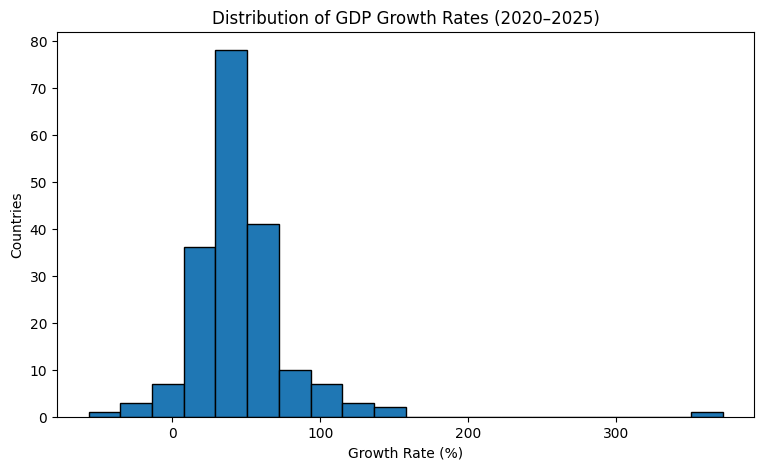

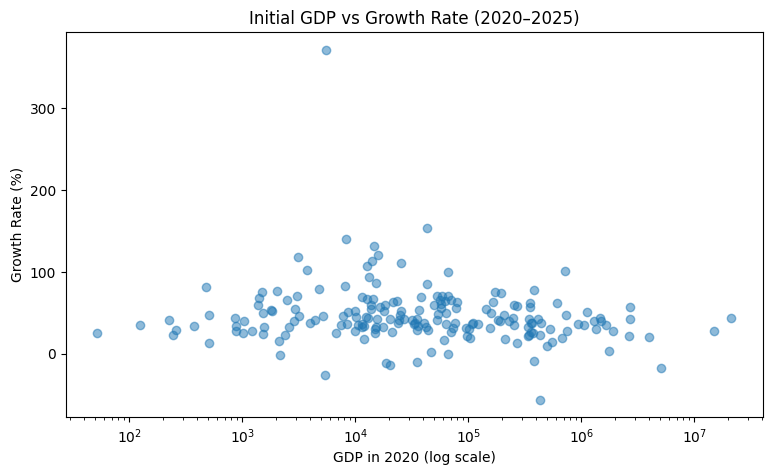

In [15]:
# Histogram
plt.hist(df["GrowthRate"].dropna(), bins=20, edgecolor="black")
plt.xlabel("Growth Rate (%)"); plt.ylabel("Countries"); plt.title("Distribution of GDP Growth Rates (2020–2025)")
plt.show()

# Scatter: Initial GDP vs GrowthRate
plt.scatter(df["2020"], df["GrowthRate"], alpha=0.5)
plt.xscale("log")
plt.xlabel("GDP in 2020 (log scale)"); plt.ylabel("Growth Rate (%)")
plt.title("Initial GDP vs Growth Rate (2020–2025)")
plt.show()


# Row stats & top GDP lines

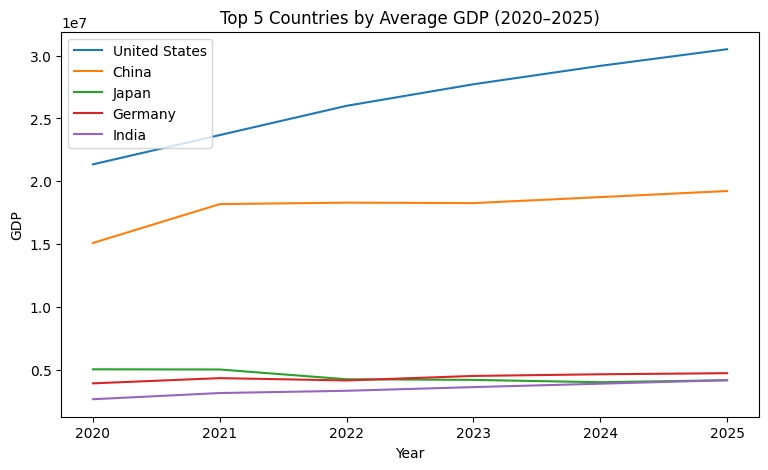

In [16]:
years = ["2020","2021","2022","2023","2024","2025"]
df["RowMean"]   = df.loc[:, years].mean(axis=1)
df["RowMedian"] = df.loc[:, years].median(axis=1)

top5 = df.nlargest(5, "RowMean")
for _, row in top5.iterrows():
    plt.plot(years, row[years], label=row["Country"])
plt.title("Top 5 Countries by Average GDP (2020–2025)")
plt.xlabel("Year"); plt.ylabel("GDP"); plt.legend()
plt.show()

# Regions & grouping

,mean,median,min,max
Region,,,,
Africa,38.98,36.65,-56.45,118.36
Asia,50.34,41.77,-17.17,139.64
Europe,42.32,39.82,12.66,85.79
North America,55.14,53.31,18.80,131.24
Oceania,29.20,29.30,12.92,41.18
South America,83.58,50.78,28.32,371.98


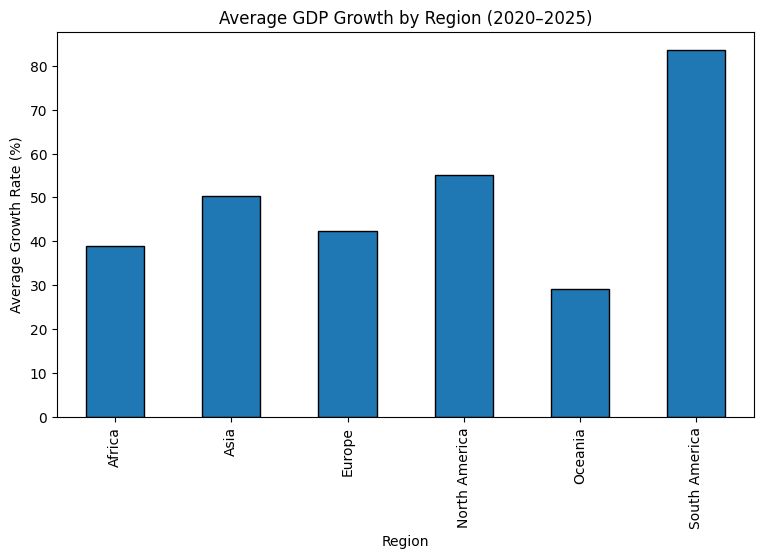

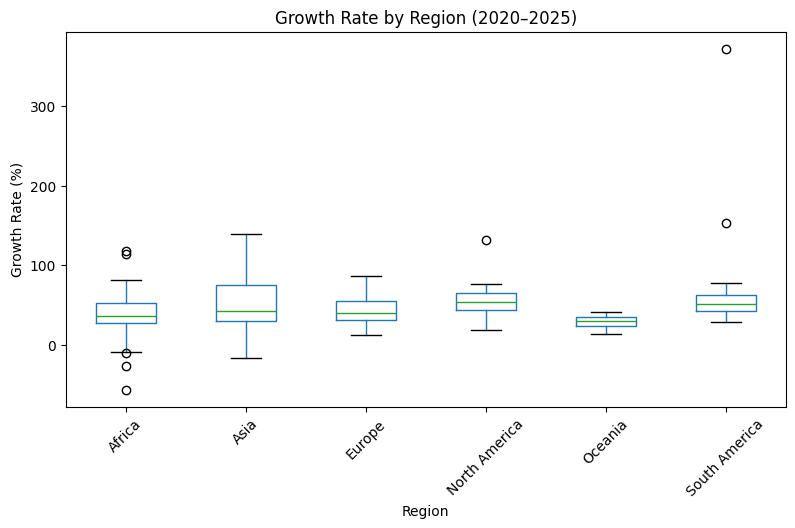

In [17]:
df["Region"] = df["Country"].apply(country_to_continent)
region_growth = df.groupby("Region")["GrowthRate"].agg(["mean","median","min","max"]).round(2)
display(region_growth)

# Bar of average growth rate by region
region_growth["mean"].plot(kind="bar", edgecolor="black")
plt.ylabel("Average Growth Rate (%)"); plt.title("Average GDP Growth by Region (2020–2025)")
plt.show()

# Boxplot by region
df.boxplot(column="GrowthRate", by="Region", grid=False, rot=45)
plt.title("Growth Rate by Region (2020–2025)"); plt.suptitle(""); plt.ylabel("Growth Rate (%)")
plt.show()

# Clean subset + categories

GrowthCategory
Shrinking        9
High Growth     65
Moderate       115
Name: count, dtype: int64

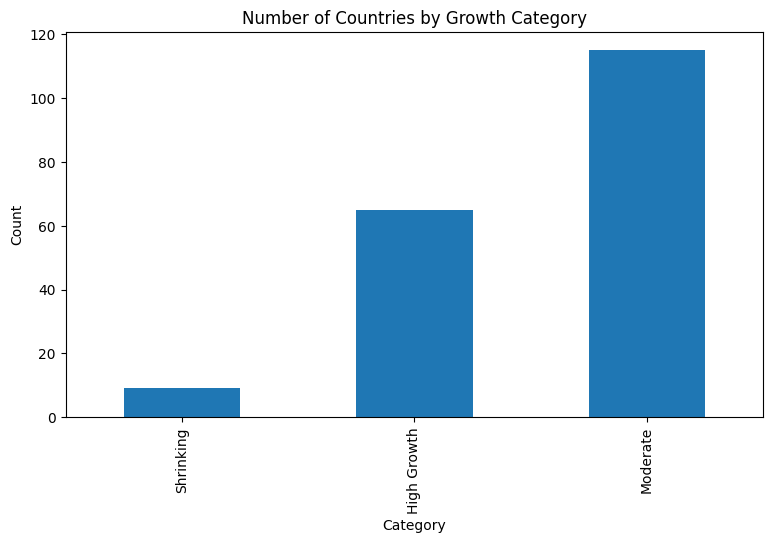

In [18]:
df_clean = df.dropna(subset=["2025"]).copy()
df_clean["GrowthCategory"] = df_clean["GrowthRate"].apply(classify_growth)
counts = df_clean["GrowthCategory"].value_counts(ascending=True)
display(counts)
counts.plot(kind="bar")
plt.title("Number of Countries by Growth Category"); plt.xlabel("Category"); plt.ylabel("Count")
plt.show()

# Transformations & ranks

In [19]:
scaler_norm = MinMaxScaler()
df_clean["GDP2020_norm"] = scaler_norm.fit_transform(df_clean[["2020"]])

scaler_std = StandardScaler()
df_clean["GDP2020_std"] = scaler_std.fit_transform(df_clean[["2020"]])

df_clean["Rank2020"] = df_clean["2020"].rank(ascending=False, method="min").astype(int)
df_clean["Rank2025"] = df_clean["2025"].rank(ascending=False, method="min").astype(int)
df_clean["RankChange"] = df_clean["Rank2020"] - df_clean["Rank2025"]

print("Top 10 Rank Gainers:")
display(df_clean.sort_values("RankChange", ascending=False).head(10)[["Country","Rank2020","Rank2025","RankChange"]])

print("Top 10 Rank Losers:")
display(df_clean.sort_values("RankChange").head(10)[["Country","Rank2020","Rank2025","RankChange"]])

Top 10 Rank Gainers:


,Country,Rank2020,Rank2025,RankChange
71,Guyana,149,118,31
190,Venezuela,88,70,18
93,Kyrgyzstan,144,128,16
72,Haiti,123,108,15
7,Armenia,131,117,14
69,Guinea,125,111,14
63,Georgia,117,105,12
188,Uzbekistan,72,61,11
102,Macau,103,93,10
153,Singapore,37,28,9


Top 10 Rank Losers:


,Country,Rank2020,Rank2025,RankChange
127,Nigeria,28,57,-29
94,Laos,112,135,-23
193,Yemen,111,134,-23
119,Myanmar,73,87,-14
165,Sudan,96,110,-14
51,Egypt,31,43,-12
159,South Sudan,150,161,-11
99,Libya,86,96,-10
65,Ghana,70,80,-10
34,Chad,121,131,-10


In [21]:
years = ["2020","2021","2022","2023","2024","2025"]

df_long = df_clean.melt(id_vars=["Country","Region"], value_vars=years,
                        var_name="Year", value_name="GDP")

pivot = df_long.pivot_table(values="GDP", index="Region", columns="Year",
                            aggfunc=["mean","median"]).round(2)
display(pivot)


mean                                                  \
Year                 2020        2021        2022        2023        2024   
Region                                                                      
Africa           47193.92    52619.55    56861.47    54550.68    52738.21   
Asia            757213.91   871357.44   883673.49   896795.21   923842.28   
Europe          515359.63   590478.32   591155.85   630332.49   660783.10   
North America  1026912.67  1150016.88  1262927.42  1349486.50  1417598.00   
Oceania         114758.79   138661.00   143762.43   145558.50   149879.79   
South America   238762.58   277767.25   321322.08   351376.33   357109.25   

                             median                                          \
Year                 2025      2020      2021      2022      2023      2024   
Region                                                                        
Africa           53716.92   14235.0   16320.0   17867.0   19411.0   19866.0   
Asia            952062.05  111048.0  148455.0  183977.0  163716.0  158568.0   
Europe          678871.51  158468.0  199835.0  178321.0  214098.0  223060.0   
North America  1467021.50   14196.5   17845.5   18414.5   19459.0   22796.5   
Oceania         147572.00     686.0     682.0     674.0     725.0     803.5   
South America   360868.67   74711.0   83960.5  102573.0  111762.0  120768.0   

                         
Year               2025  
Region                   
Africa          20391.0  
Asia           153101.0  
Europe         237070.0  
North America   23939.0  
Oceania           864.0  
South America  117094.0

In [ ]:
from pathlib import Path
Path("charts").mkdir(exist_ok=True); Path("outputs").mkdir(exist_ok=True)
region_growth.to_csv("outputs/region_growth_summary.csv")
pivot.to_csv("outputs/region_gdp_mean_median.csv")  # if you created pivot
plt.gcf().savefig("charts/last_plot.png", dpi=150, bbox_inches="tight")  # run after a plot